## 앙상블 학습: 
여러 개의 Classifier를 생성하고 그 예측들을 결합해 더 정확한 최종 예측을 도출하는 다.1)
--> 전통적으로는 보팅, 배깅, 부스팅 방식으로 분류2)
--> 그 외에도 스태깅 등 다양한 방법이-음

>> 보팅과 배깅 방식은 여러 개의 분류기가 투표를 통해 과를 예측르-  결정한다.
그러나 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 이용한 예측을 결- 합하게 되고,
배깅의 경우 분류기는 동일하지만, 각 분류기가 데이터 샘플링을 다르게 행하게 됨. 수* 헹하게 된다.

부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하는데, 앞에서 학습한 분류기가 예측이 틀렸을 경우 다음에 학습을 진행하는 분류기에는 가중치를 부여해 결과함 수*  있도록 한다. 

스태깅은 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습 시과를 예측## 하는 방식이다
1) 



   - 하드 보팅은 다수결의 원칙과 비슷. 다수의 결정기가 예측한 결괏값을 최종 보팅 결괏값으로 선정하는 것
2) 식  <==종    -  보팅 결괏값으로 선정하는 것


소프트 보팅은 각 결정기의 레이블 값 결정 확률을 모두 더하고, 이를 평균해 이 중 확률이 가장 높은값        * 을 최종 보팅 결괏값으로 선정한다. 

ex) 레이블 3개 --> 각 결정기는 최종 레이블이 레이블 a일 확률         * / b일 확률 / c일 확률 을 구하게 됨
===> 각 레이블에 해당하는 확률을 모두 더해 평균 값을 구하고 가장 높은 확률 값의 레이블이 최종 선택됨

>> 보팅 분류기 Voting Classifier 클래스 제공



보팅으로 여러 개의 기반 분류기를 결합한다님건 기반 분류기보다 예측 성능이 향상되는 것은 아니다. 

정확한 예측을 위한 학습 데이터의 예외
 상황에 집착하는 결정트리의 특징이 유발하는 과적합 상황을 앙상블은 분류기를 결합해 다양한 상황을 학습함으로써 극복하게 된다. 


## 랜덤 포레스트
### 배깅 방
 = 하나의 알고리즘으로 여러 개의 분류기 만들어서 최종 결정하는 알고리 
Ex) 랜덤 포레스트  by,. RandomForestClassifie


부트스트래핑 분
할 방식 ==> 랜덤 포레스트의 각 분류기가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩링. 즉, 복원 추출링 된다.

>> 랜덤 포레스트의 파라미터
- n_estimator    = 결정 트리의 개수 지정
- max_features   = 결정 트리에서 사용된 max_fe음 res와 같다! 
- max_depth  /  min_samples_leaf, min_samples_split 같이 결정 트리에서 사용됐던 파터도 이용 가능



>> 하이퍼 파라미터 튜닝 by GridSearchCV   -- 각 파라미터 별로 여러개의 값들을 설정하고, 이 값들의 최적 조합을 찾아내는 것 == 하이퍼 파라미터 튜닝 

--- 랜덤 포레스트는 예측 성능이 약간 떨어질 수는 있으나, 병렬 처리를으로 빠르게 학습이 가능하다.
그래서 일단 랜덤 포레스트로 음 


## GBM  = Gradient Boosting Machine    by. GradientBoostingClassifier 클래스
### 부스팅 방식
 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해, 오류를 개선하면서 학습하는 방식

Ex) 그래디언트 부스트 . AdaBoost   --> 가중치 업데이트에서 차이음있다.

1. 에이다 부스트

2. GBM ==> 경사 하강법을 통해 가
   치[ 업데이트 
오류값 = 실] : 값 - 예측값
h(x = y     - (x) 예측함수

이 오류식 h(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하이 경사 하강법이다.


GBM이 랜덤 포레스트보다 예측 성능이 뛰어나지만, 소요 시간이 길고 하이터 파라미터 튜닝에 이 있음야 ####는 단점이 있다. 

>> GBM의 파라미터 
- loss : 경사 하강법에서 사용할 비용 함수 지정  ex 디폴트값 = deviance

- n_estimator : weak learner의 개수 
- learning_rate : 
  습을 진행할 때마다 적용하는 학습률 
>> 이 두 파라미음 서로 조합해서 사용하는 경우가 많다.
learning_rate 를 작게 하고, n_estimator을 크게 
>> 면 한계점까지 예측 성능 키울 수 있음 그러나 시간 오래 걸림   & 예측 성능이 드라마틱하게 좋아지지는 않는다. 

- subsample  :  weak learner가 학습에 사용하는 데이터의 샘플링 비율


## XGBoost    = eXtra Gradient Boost
 _ 분류에 있어서 다른 머신러닝보다 뛰어난 예측 성능을 나냄. 

> XGBoost 의 파라미터  = 일반 파라미터  / 부스터 파라미터  . 학습 태스크 파라미#터

## 부스터 파라미터  _ 과적합 감소 효과가 있는  ... 
- eta = GBM의 learning rate 파라미터 
- sub_sample = GBM의 subsample과 동일한 파라미터
- colsample_bytree = GBM의 max_features과 유사한 파라미터

- max_depth = 결정 트리의 max_depth 파라미터와 동일
- min_child_weight = 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터의 weight 총합
                                 >> 값이 클 수록 분할을 자제하게 된다
- gamma  = 트리의 리프 노드를 추가적으로 나눌지를 결정하는감소 값

..... 

과적합 상황이 발생했다면 eta / ma
x_depth 값을 낮추거나  & min_child_weight /g음.
a 값을 높이는 방법이 있다. 그 외에도 subsample과 colsample_bytree 를 조정하됨,도 적합###문제에 도움이 된다. 



>##  사이킷런 래퍼 XGBoost 

##파라미터
- eta를 learning rate로 
- sub_sample를 subsample로
- lambda를 reg_lamblpha를 reg_alpha로 

변경해서 사용함 default = 1 (전체 데이터 이용)모델을 구축하는 경우가 많다. 
>> 결정트리의 장점은 그대로 가져오면서 단점은 보완하는 것

In [3]:
## 보팅 분류기 실습 _ 위스콘신 유방암 데이터 세트

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561


In [7]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


In [15]:
import pandas as pd

def get_human_dataset():
    feature_name_df =pd.read_csv(r"C:\Users\rud92\0.ESAA\features.txt", sep ='\s+', header=None, names=['column_index', 'column_name'])

    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt", sep='\s+', names=feature_name) 
    X_test = pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt", sep='\s+', names=feature_name)

    y_train =pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt", sep='\s+', header=None, names=['action']) 
    y_test = pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt", sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [17]:
# 랜덤 포레스트 기본 실습

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [19]:
## 랜덤 포레스트 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100],'max_depth' : [6, 8, 10, 12], 'min_samples_leaf' : [8, 12, 18 ],'min_samples_split' : [8, 16, 20]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [21]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


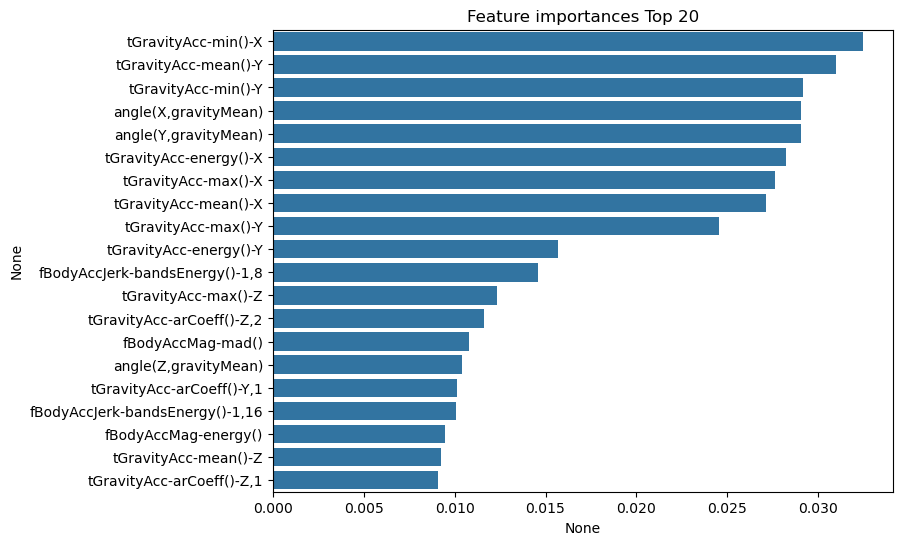

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [71]:
## GBM 기본 실습

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9393
GBM 수행 시간: 2151.0 초 


In [27]:
## 위스콘신 유방암 예측에 파이썬 래퍼 XGBoost 적용하기

import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']= labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [29]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [31]:
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,test_size=0.2, random_state=156 )

X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [33]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [35]:
params = { 'max_depth':3,'eta': 0.05,'objective':'binary:logistic','eval_metric':'logloss'}
num_rounds = 400

In [37]:
eval_list = [(dtr,'train'),(dval,'eval')]

xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )
             

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [39]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])        

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [47]:
from sklearn.metrics import accuracy_score, precision_score , recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    

In [49]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC:0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

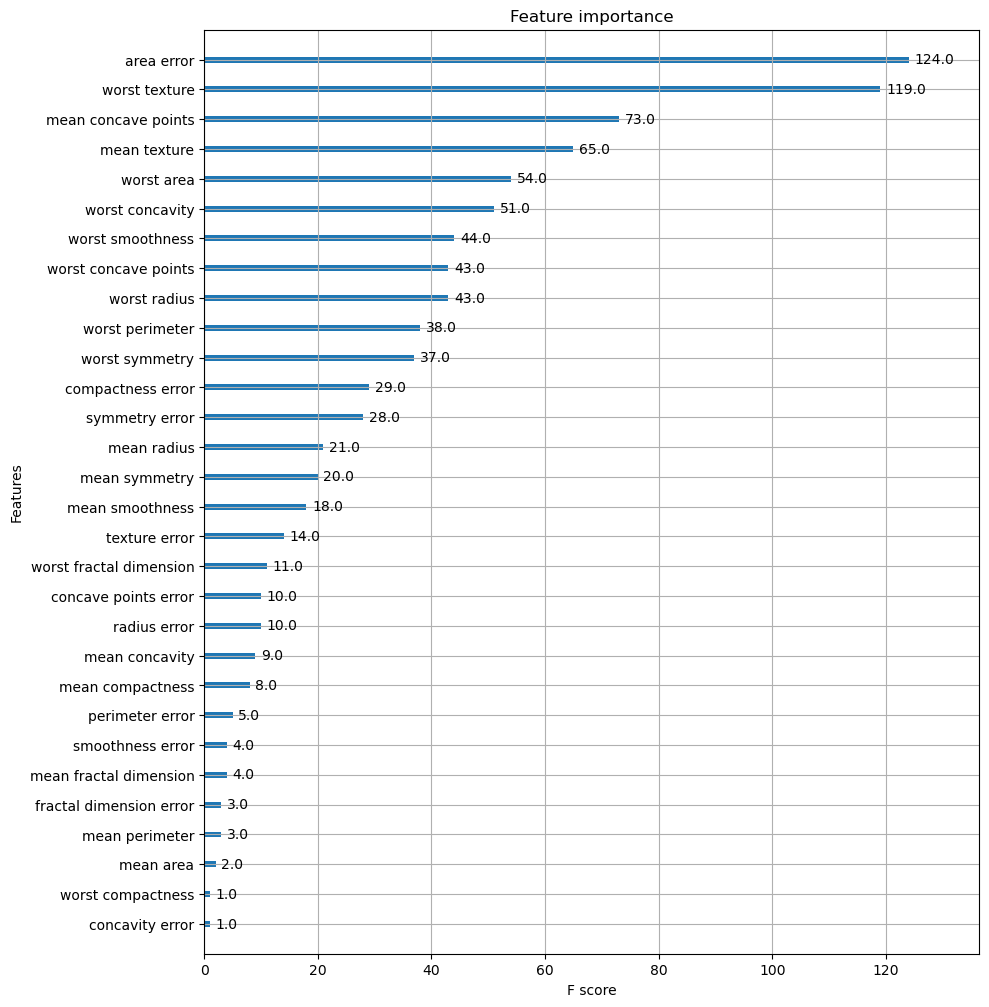

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [55]:
##위스콘신 유방암 예측에 사이킷런 래퍼 XGBoost 적용하기

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [57]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9954


In [63]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric="logloss")
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.62456	validation_1-logloss:0.62158
[1]	validation_0-logloss:0.58665	validation_1-logloss:0.59139
[2]	validation_0-logloss:0.55183	validation_1-logloss:0.56009
[3]	validation_0-logloss:0.52052	validation_1-logloss:0.53465
[4]	validation_0-logloss:0.49177	validation_1-logloss:0.51265
[5]	validation_0-logloss:0.46552	validation_1-logloss:0.49116
[6]	validation_0-logloss:0.44048	validation_1-logloss:0.47068
[7]	validation_0-logloss:0.41739	validation_1-logloss:0.44938
[8]	validation_0-logloss:0.39592	validation_1-logloss:0.43168
[9]	validation_0-logloss:0.37589	validation_1-logloss:0.41667
[10]	validation_0-logloss:0.35726	validation_1-logloss:0.39896
[11]	validation_0-logloss:0.34026	validation_1-logloss:0.38193
[12]	validation_0-logloss:0.32406	validation_1-logloss:0.36673
[13]	validation_0-logloss:0.30894	validation_1-logloss:0.35399
[14]	validation_0-logloss:0.29484	validation_1-logloss:0.34209
[15]	validation_0-logloss:0.28146	validation_1-logloss:0.32900
[1

In [ ]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

In [67]:
xgb_wrapper2 = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric="logloss")

xgb_wrapper2.fit(X_train, y_train, eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper2.predict(X_test)
ws10_pred_proba = xgb_wrapper2.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62456	validation_1-logloss:0.62158
[1]	validation_0-logloss:0.58665	validation_1-logloss:0.59139
[2]	validation_0-logloss:0.55183	validation_1-logloss:0.56009
[3]	validation_0-logloss:0.52052	validation_1-logloss:0.53465
[4]	validation_0-logloss:0.49177	validation_1-logloss:0.51265
[5]	validation_0-logloss:0.46552	validation_1-logloss:0.49116
[6]	validation_0-logloss:0.44048	validation_1-logloss:0.47068
[7]	validation_0-logloss:0.41739	validation_1-logloss:0.44938
[8]	validation_0-logloss:0.39592	validation_1-logloss:0.43168
[9]	validation_0-logloss:0.37589	validation_1-logloss:0.41667
[10]	validation_0-logloss:0.35726	validation_1-logloss:0.39896
[11]	validation_0-logloss:0.34026	validation_1-logloss:0.38193
[12]	validation_0-logloss:0.32406	validation_1-logloss:0.36673
[13]	validation_0-logloss:0.30894	validation_1-logloss:0.35399
[14]	validation_0-logloss:0.29484	validation_1-logloss:0.34209
[15]	validation_0-logloss:0.28146	validation_1-logloss:0.32900
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

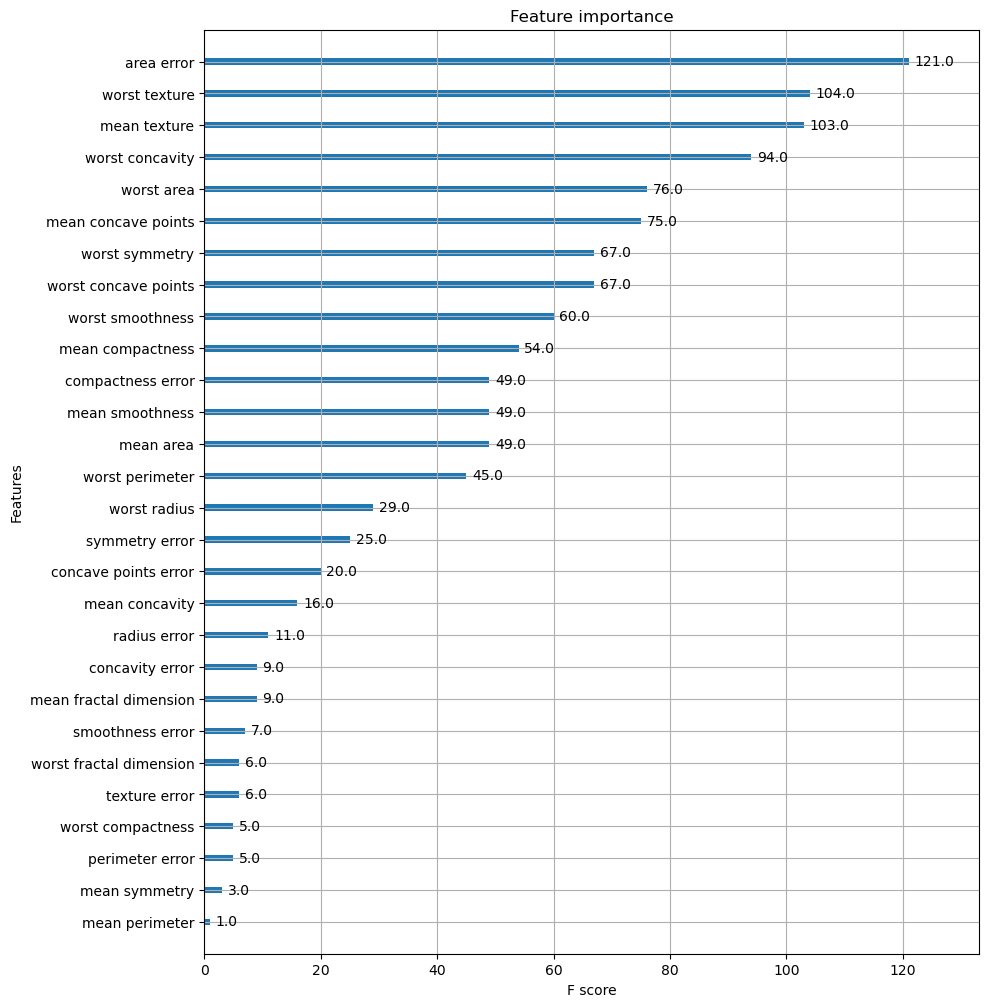

In [69]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)